# Hello all my name is MVPS AKHIL 

__I am a data science enthusiastic currently purusing final year Post Graduate Diploma in Management at the Institute of Public Enterprise__

- My Github link : https://github.com/dataisticakhil
- My Linkedin Profile : https://www.linkedin.com/in/mvps-akhil-b378b1178/
- My Kaggle Profile : https://www.kaggle.com/dataisticakhil

__I will be working on with small dataset called Income Data , this data contains their age and income infomation .We will analyse and understand the customer segements that might exist and identify the key attributes of each segment__

# Importing necessary Packages 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline 

# Loading the Dataset 

In [2]:
customers_df = pd.read_csv('Income Data.csv')

In [3]:
#Print first few records from the datset

In [4]:
customers_df.head(5)

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80


__To visualize the relationship between age and income of customers we will draw a scatter plot__

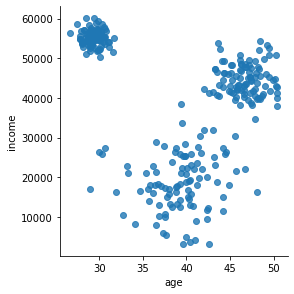

In [6]:
sn.lmplot('age','income', data=customers_df, fit_reg = False,
           height = 4);

__Fig : Income-age scatter plot of customers__

# K MEANS CLUSTERING 


In [7]:
from sklearn.cluster import KMeans
clusters = KMeans(3)
clusters.fit(customers_df)

KMeans(n_clusters=3)

In [8]:
customers_df['clusterid'] = clusters.labels_

Printing first five customers with their cluster centers

In [9]:
customers_df[0:5]

,income,age,clusterid
0,41100.0,48.75,0
1,54100.0,28.10,2
2,47800.0,46.75,0
3,19100.0,40.25,1
4,18200.0,35.80,1


The three segments are numbered as 0,1,2. The first customer belongs to cluster 1 whereas the second cluster belongs to cluster 2 and so on.

# Plotting Customers with Their Segments

C:\Users\Akhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


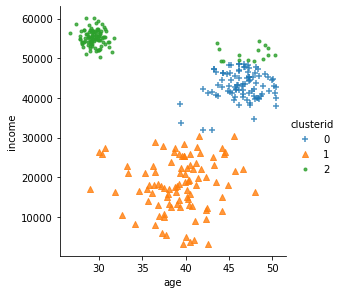

In [11]:
markers = ['+','^','.']
sn.lmplot('age','income',
           data = customers_df,
           hue = 'clusterid',
           fit_reg = False,
           markers = markers,
           height = 4) ;

__Three customer segments created by clustering__

# Normalizing Features 

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
scaled_customers_df = scaler.fit_transform(customers_df[['age','income']])
scaled_customers_df[0:5]

array([[ 1.3701637 ,  0.09718548],
       [-1.3791283 ,  0.90602749],
       [ 1.10388844,  0.51405021],
       [ 0.23849387, -1.27162408],
       [-0.35396857, -1.32762083]])

We can create the clusters again using normalized feature set

In [15]:
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(scaled_customers_df)
customers_df['clusterid_new'] = clusters_new.labels_

The new segments created can be plotted using scatter plot and marking each segment differently

In [16]:
markers = ['+','^','.']

C:\Users\Akhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


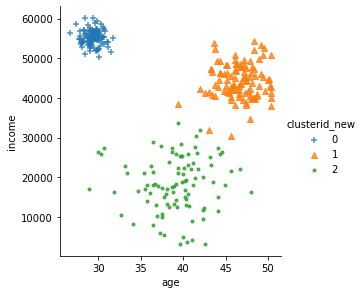

In [18]:
sn.lmplot('age','income',
           data = customers_df,
           hue = 'clusterid_new',
           fit_reg = False,
           markers = markers,
           height = 4) ;

Three customers segments created by clustering after normalizing features

Now the clusters seems to be have created properly , The cluster centers are given by clusters.cluster_centers_

In [19]:
clusters.cluster_centers_

array([[4.30539326e+04, 4.64191011e+01],
       [1.81447917e+04, 3.91744792e+01],
       [5.46756522e+04, 3.17004348e+01]])

# Clusters Centers and Interpreting the Clusters

In [21]:
customers_df.groupby('clusterid')['age','income'].agg(['mean','std']).reset_index()

<ipython-input-21-bd26a9b39d98>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customers_df.groupby('clusterid')['age','income'].agg(['mean','std']).reset_index()


clusterid        age                  income             
                  mean       std          mean          std
0         0  46.419101  2.289620  43053.932584  3613.769632
1         1  39.174479  3.626068  18144.791667  6745.241906
2         2  31.700435  6.122122  54675.652174  2362.224320